# Chapter 3 - Ex4: LowBirthWeight
# Cung cấp dữ liệu birthweight_reduced.csv

## Yêu cầu: Áp dụng Logistic Regression để thực hiện việc xác định trẻ có thiếu cân hay không dựa vào thông tin còn lại.
1. Hãy đọc dữ liệu từ tập tin này. Chuẩn hóa dữ liệu nếu cần.
2. Tạo X_train, X_test, y_train, y_test từ dữ liệu đọc được với tỷ lệ dữ liệu test là 0.3
3. Áp dụng thuật toán Logistic Regression
4. Kiểm tra độ chính xác
5. Tìm kết quả Cho dữ liệu Test: X_now = [[12, 18, 4.5, 35, 1, 41, 7, 65, 125, 37, 14, 25, 68, 1, 1]]

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

np.set_printoptions(suppress=True)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 10)

## <span style='color:yellow'> 1. Hãy đọc dữ liệu từ tập tin này. Chuẩn hóa dữ liệu nếu cần.

In [6]:
lbw = pd.read_csv('Data/birthweight_reduced.csv')
lbw

,id,headcirumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,LowBirthWeight
0,1313,12,17,5.8,33,0,24,0,58,99,26,16,0,66,1,0,Low
1,431,12,19,4.2,33,1,20,7,63,109,20,10,35,71,1,0,Low
2,808,13,19,6.4,34,0,26,0,65,140,25,12,25,69,0,0,Normal
3,300,12,18,4.5,35,1,41,7,65,125,37,14,25,68,1,1,Low
4,516,13,18,5.8,35,1,20,35,67,125,23,12,50,73,1,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,553,14,21,8.6,42,0,24,0,69,143,30,12,0,72,0,0,Normal
38,1191,13,21,8.0,42,0,21,0,65,132,21,10,25,73,0,0,Normal
39,1360,13,22,10.0,44,0,20,0,63,125,23,10,35,70,0,0,Normal
40,223,13,19,8.5,45,1,28,25,64,118,30,16,0,72,0,0,Normal


In [8]:
lbw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                42 non-null     int64  
 1   headcirumference  42 non-null     int64  
 2   length            42 non-null     int64  
 3   Birthweight       42 non-null     float64
 4   Gestation         42 non-null     int64  
 5   smoker            42 non-null     int64  
 6   motherage         42 non-null     int64  
 7   mnocig            42 non-null     int64  
 8   mheight           42 non-null     int64  
 9   mppwt             42 non-null     int64  
 10  fage              42 non-null     int64  
 11  fedyrs            42 non-null     int64  
 12  fnocig            42 non-null     int64  
 13  fheight           42 non-null     int64  
 14  lowbwt            42 non-null     int64  
 15  mage35            42 non-null     int64  
 16  LowBirthWeight    42 non-null     object 
dtyp

In [10]:
lbw.isnull().sum()

id                  0
headcirumference    0
length              0
Birthweight         0
Gestation           0
                   ..
fnocig              0
fheight             0
lowbwt              0
mage35              0
LowBirthWeight      0
Length: 17, dtype: int64

In [12]:
lbw.drop(['id', 'LowBirthWeight'], axis=1).describe()

,headcirumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,13.261905,19.928571,7.264286,39.190476,0.523810,25.547619,9.428571,64.404762,125.857143,28.904762,13.666667,17.190476,70.761905,0.142857,0.095238
std,0.766987,1.112958,1.329739,2.643336,0.505487,5.666342,12.511737,2.547687,15.879994,6.863866,2.160247,17.308165,2.843988,0.354169,0.297102
min,12.000000,17.000000,4.200000,33.000000,0.000000,18.000000,0.000000,58.000000,99.000000,19.000000,10.000000,0.000000,66.000000,0.000000,0.000000
25%,13.000000,19.000000,6.450000,38.000000,0.000000,20.250000,0.000000,63.000000,115.000000,23.000000,12.000000,0.000000,69.000000,0.000000,0.000000
50%,13.000000,20.000000,7.250000,39.500000,1.000000,24.000000,4.500000,64.000000,125.000000,29.500000,14.000000,18.500000,71.000000,0.000000,0.000000
75%,14.000000,21.000000,8.000000,41.000000,1.000000,29.000000,15.750000,66.000000,135.000000,32.000000,16.000000,25.000000,72.000000,0.000000,0.000000
max,15.000000,22.000000,10.000000,45.000000,1.000000,41.000000,50.000000,71.000000,170.000000,46.000000,16.000000,50.000000,78.000000,1.000000,1.000000


In [14]:
lbw['LowBirthWeight'].value_counts()

LowBirthWeight
Normal    36
Low        6
Name: count, dtype: int64

## <span style='color:yellow'> 2. Tạo X_train, X_test, y_train, y_test từ dữ liệu đọc được với tỷ lệ dữ liệu test là 0.3
## <span style='color:yellow'> 3. Áp dụng thuật toán Logistic Regression
## <span style='color:yellow'> 4. Kiểm tra độ chính xác

### Output: lbw['LowBirthWeight']
### Input: other columns except 'id'

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

   Y_test_true Y_test_predict
3          Low         Normal
2       Normal         Normal
23      Normal         Normal
39      Normal         Normal
17      Normal         Normal
..         ...            ...
31      Normal         Normal
22      Normal         Normal
21      Normal         Normal
33      Normal         Normal
27      Normal         Normal

[13 rows x 2 columns]

Accuracy score on train set: 1.0
Accuracy score on test set: 0.9230769230769231

Confusion matrix:
         Low  Normal
Low       0       1
Normal    0      12


Classification report:
               precision    recall  f1-score   support

         Low        nan      0.00      0.00         1
      Normal       0.92      1.00      0.96        12

    accuracy                           0.92        13
   macro avg       0.92      0.50      0.48        13
weighted avg       0.92      0.92      0.89        13



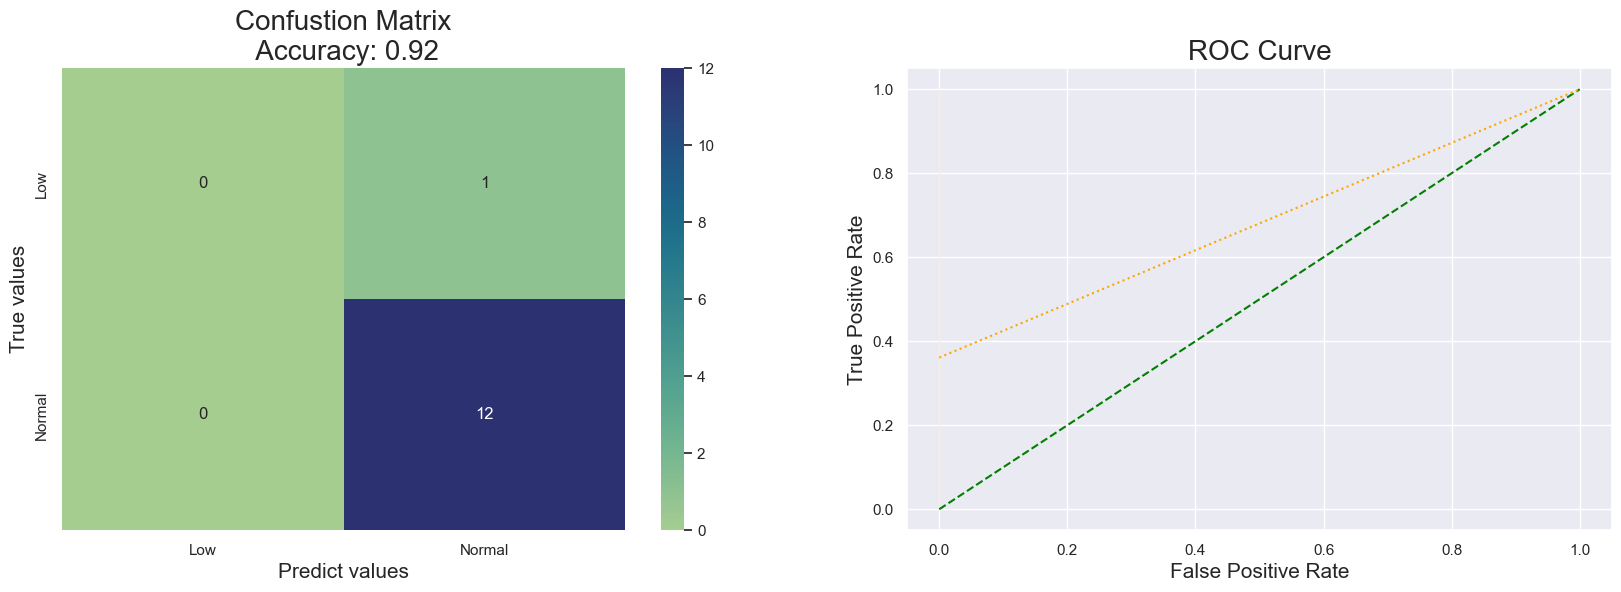

In [66]:
#Create train and test set
x = lbw.drop(['id', 'LowBirthWeight'], axis=1)
y = lbw['LowBirthWeight']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

#Build and train model
logreg_pipe = Pipeline([
    ('SMOTE_oversample', SMOTE(random_state=1, k_neighbors=4)), #y_train 'Low' class has only 5 values => must set k_neighbors <5
    ('Robust_Scale', RobustScaler()),
    ('Logistic_Regression', LogisticRegression())
])

logreg_pipe.fit(x_train, y_train)

y_test_pred = logreg_pipe.predict(x_test)
y_test_proba = logreg_pipe.predict_proba(x_test)

#Predict and calculate results
print(pd.DataFrame({'Y_test_true': y_test, 'Y_test_predict': y_test_pred}))

print(f'\nAccuracy score on train set: {accuracy_score(y_train, logreg_pipe.predict(x_train))}')
print(f'Accuracy score on test set: {accuracy_score(y_test, y_test_pred)}')

labels=['Low', 'Normal']
cm_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred), index=labels, columns=labels)
print(f'\nConfusion matrix:\n {cm_df}')

print(f'\n\nClassification report:\n {classification_report(y_test, y_test_pred, zero_division=np.nan)}')

#Visualization
plt.figure(figsize=(20,6))

sbn.set_theme(style='darkgrid')

plt.subplot(1,2,1)
sbn.heatmap(cm_df, cmap='crest', annot=True)
plt.xlabel('Predict values', size=15)
plt.ylabel('True values', size=15)
plt.title(f'Confustion Matrix\n Accuracy: {accuracy_score(y_test, y_test_pred):.2f}', size=20)

fpr, tpr, thresholds = roc_curve(y_test, y_test_proba[:,1], pos_label='Normal')
plt.subplot(1,2,2)
sbn.lineplot(x=[0,1], y=[0,1], linestyle='--', color='green')
sbn.lineplot(x=fpr, y=tpr, linestyle='dotted', color='orange')
plt.xlabel('False Positive Rate', size=15)
plt.ylabel('True Positive Rate', size=15)
plt.title('ROC Curve', size=20)

plt.show()

## <span style='color:yellow'> 5. Tìm kết quả Cho dữ liệu Test: X_now = [[12, 18, 4.5, 35, 1, 41, 7, 65, 125, 37, 14, 25, 68, 1, 1]]

In [22]:
x = lbw.drop(['id', 'LowBirthWeight'], axis=1)
x_now = pd.DataFrame([[12, 18, 4.5, 35, 1, 41, 7, 65, 125, 37, 14, 25, 68, 1, 1]], columns = x.columns)
logreg_pipe.predict(x_now)

array(['Normal'], dtype=object)

## <span style='color:yellow'> hay lua chon lai so luong thuoc tinh phu hop nhat cho bai toan nay
## <span style='color:yellow'> build lai model dua tren so luong thuoc tinh da chon
## <span style='color:yellow'> so sanh voi ket qua da lam cho 15 thuoc tinh o tren

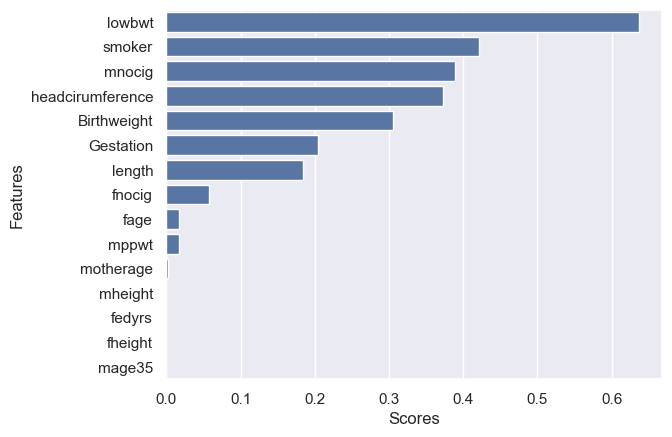

In [48]:
x = lbw.drop(['id', 'LowBirthWeight'], axis=1)
y = lbw['LowBirthWeight']

from sklearn.feature_selection import SelectKBest, mutual_info_classif

kbest = SelectKBest(score_func=mutual_info_classif, k='all').fit(x, y)

df_kbest_scores = pd.DataFrame({
    'Features':x.columns,
    'Scores':kbest.scores_
})

df_kbest_scores = df_kbest_scores.sort_values(by='Scores', ascending=False)
sbn.barplot(data=df_kbest_scores, y='Features', x='Scores', orient='h')
plt.show()

## Choose [['lowbwt', 'smoker', 'mnocig', 'headcirumference', 'Birthweight', 'Gestation', 'length']] as inputs

   Y_test_true Y_test_predict
3          Low            Low
2       Normal         Normal
23      Normal         Normal
39      Normal         Normal
17      Normal         Normal
..         ...            ...
31      Normal         Normal
22      Normal         Normal
21      Normal         Normal
33      Normal         Normal
27      Normal         Normal

[13 rows x 2 columns]

Accuracy score on train set: 1.0
Accuracy score on test set: 1.0

Confusion matrix:
         Low  Normal
Low       1       0
Normal    0      12


Classification report:
               precision    recall  f1-score   support

         Low       1.00      1.00      1.00         1
      Normal       1.00      1.00      1.00        12

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



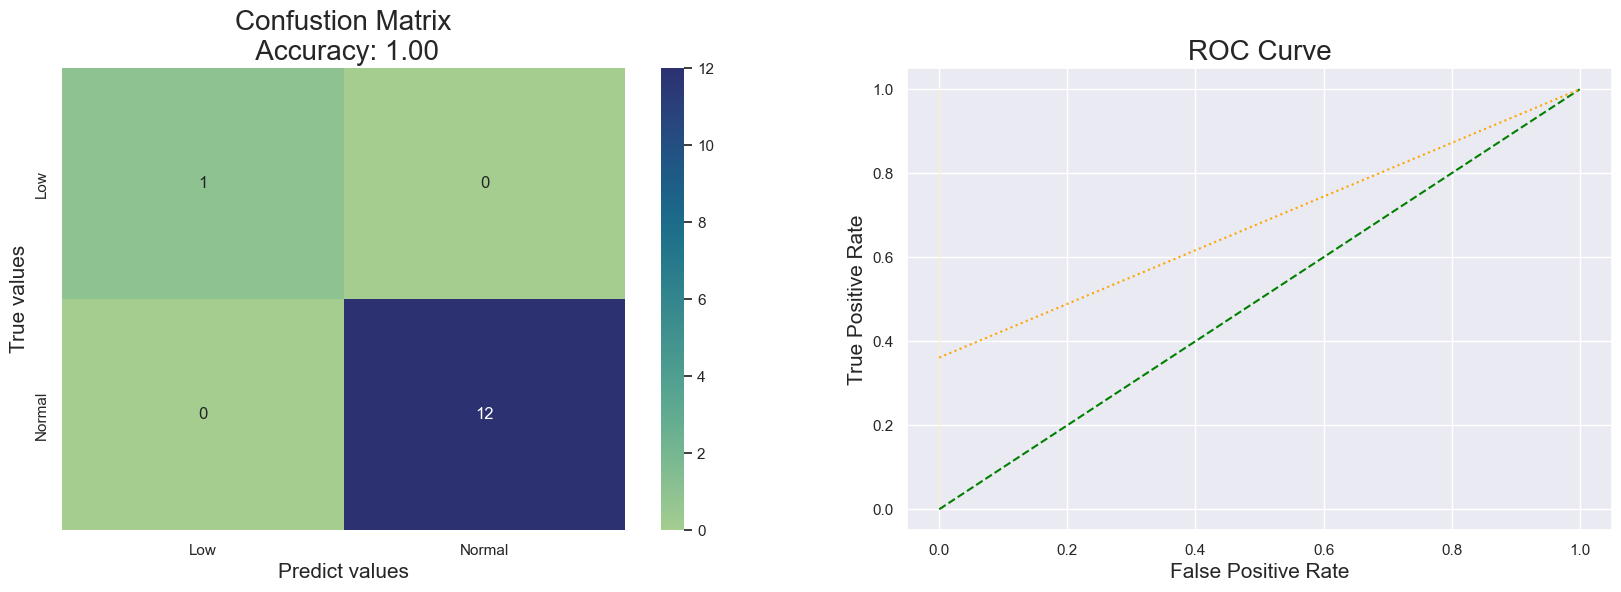

In [54]:
#Create train and test set
x = lbw[['lowbwt', 'smoker', 'mnocig', 'headcirumference', 'Birthweight', 'Gestation', 'length']]
y = lbw['LowBirthWeight']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

#Build and train model
logreg_pipe = Pipeline([
    ('SMOTE_oversample', SMOTE(random_state=1, k_neighbors=4)), #y_train 'Low' class has only 5 values => must set k_neighbors <5
    ('Robust_Scale', RobustScaler()),
    ('Logistic_Regression', LogisticRegression())
])

logreg_pipe.fit(x_train, y_train)

y_test_pred = logreg_pipe.predict(x_test)
y_test_proba = logreg_pipe.predict_proba(x_test)

#Predict and calculate results
print(pd.DataFrame({'Y_test_true': y_test, 'Y_test_predict': y_test_pred}))

print(f'\nAccuracy score on train set: {accuracy_score(y_train, logreg_pipe.predict(x_train))}')
print(f'Accuracy score on test set: {accuracy_score(y_test, y_test_pred)}')

labels=['Low', 'Normal']
cm_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred), index=labels, columns=labels)
print(f'\nConfusion matrix:\n {cm_df}')

print(f'\n\nClassification report:\n {classification_report(y_test, y_test_pred, zero_division=np.nan)}')

#Visualization
plt.figure(figsize=(20,6))

sbn.set_theme(style='darkgrid')

plt.subplot(1,2,1)
sbn.heatmap(cm_df, cmap='crest', annot=True)
plt.xlabel('Predict values', size=15)
plt.ylabel('True values', size=15)
plt.title(f'Confustion Matrix\n Accuracy: {accuracy_score(y_test, y_test_pred):.2f}', size=20)

fpr, tpr, thresholds = roc_curve(y_test, y_test_proba[:,1], pos_label='Normal')
plt.subplot(1,2,2)
sbn.lineplot(x=[0,1], y=[0,1], linestyle='--', color='green')
sbn.lineplot(x=fpr, y=tpr, linestyle='dotted', color='orange')
plt.xlabel('False Positive Rate', size=15)
plt.ylabel('True Positive Rate', size=15)
plt.title('ROC Curve', size=20)

plt.show()

## <span style='color:green'> After applying select K best features, the accuracy now is 100%